In [8]:
import numpy as np
import matplotlib.pyplot as plt

In [9]:
t_values = np.linspace(0, 10, 1000)

inertial_k1 = 0.3  
intensity_k2 = 0.3  
R0 = 0.01

mean = 0
sigma = 1
normal_distribution_xi_t = np.random.normal(mean, sigma, size=t_values.shape)

f_t = np.cos(t_values)

stimulus_intensity_I_t_1 = [intensity_k2 * (f_t[t] - f_t[t - 1]) for t in range(1, len(t_values))]
stimulus_intensity_I_t_2 = [
    (intensity_k2 * (f_t[t] - f_t[t - 1])) / f_t[t - 1] if f_t[t - 1] != 0 else 0
    for t in range(1, len(t_values))
]

In [10]:
M_t = [0]

for t in range(1, len(t_values)):
    if f_t[t - 1] > 0:
        M_t.append(
            inertial_k1 * M_t[t - 1]
            + normal_distribution_xi_t[t]
            + stimulus_intensity_I_t_2[t - 1]
        )
    else:
        M_t.append(
            inertial_k1 * M_t[t - 1]
            + normal_distribution_xi_t[t]
            + stimulus_intensity_I_t_1[t - 1]
        )

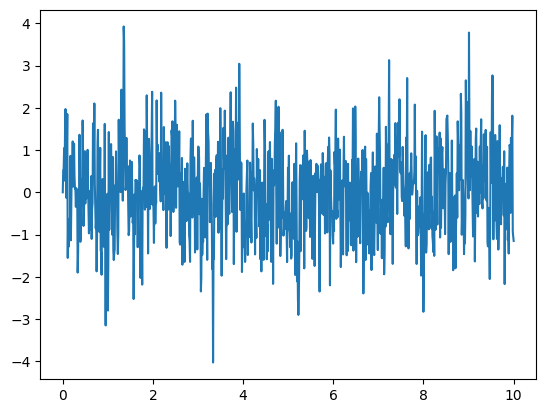

In [11]:
plt.plot(t_values, M_t)
plt.show()

### Тактика А

In [12]:
x, y = [0.001], [0.001]

In [13]:
for t in range(1, len(t_values)):
    dx, dy = x[-1], y[-1]
    
    norm = np.sqrt(dx**2 + dy**2) if np.sqrt(dx**2 + dy**2) != 0 else 1.0
    cos_phi0 = dx / norm
    sin_phi0 = dy / norm
    
    delta_x = R0 * cos_phi0
    delta_y = R0 * sin_phi0
    
    x.append(x[-1] + delta_x)
    y.append(y[-1] + delta_y)

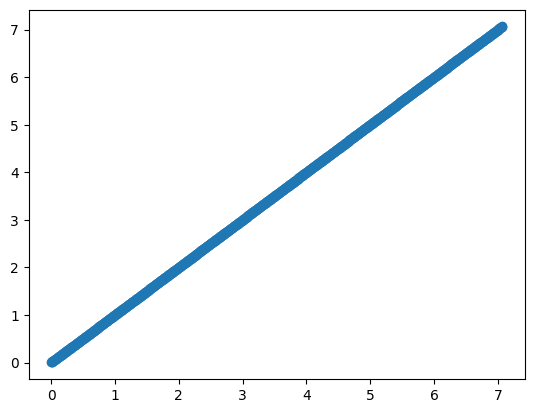

In [14]:
plt.plot(x, y, marker="o", label="Траектория анимата")
plt.show()